In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
"""
Load UCI ML Iris data
Return: data(shape = (150, 4)) and labels(shape = (150, 1)) in numpy array(rank 2)
"""
def load_data(classes):
    data = pd.read_csv('Iris.csv', index_col=0).as_matrix()
    features = data[:, :-1]
    labels = data[:, -1].reshape(-1, 1)
    for class_id in classes:
        labels[labels == class_id[0]] = class_id[1]
    return features.astype(np.float32), labels.astype(np.float32)

In [3]:
"""
Perform Data Shuffling
Return: shuffled features and labels
"""
def data_shuffling(features, labels):
    shuffle_array = np.random.permutation(features.shape[0])
    features = features[shuffle_array]
    labels = labels[shuffle_array]
    return features, labels

In [4]:
"""
Splitting the data into train and test set
Variable: ratio = percentage of data for train set
Return: train set and test set
"""
def data_split(features, labels, ratio=0.7):
    train_end_index = np.ceil(features.shape[0] * 0.7).astype(np.int32)
    train_features = features[:train_end_index]
    train_labels = labels[:train_end_index]
    test_features = features[train_end_index:]
    test_labels = labels[train_end_index:]
    return train_features, train_labels, test_features, test_labels

In [5]:
"""
k-NN inferening 
Variable: k = k-nearest neightbour
Return: predictions to inference set
"""
def kNN_inference(train_features, train_labels, inf_features, k=3):
    
    #Properties#
    train_data_size = train_features.shape[0]
    train_features_size = train_features.shape[1]
    inf_data_size = inf_features.shape[0]
    
    #Define saver of predictions #
    predictions = np.empty((inf_features.shape[0], 1))
    
    #Compute the predictions for all in inference set#
    for i in range(inf_data_size):
        current_inf = np.tile(inf_features[i].reshape(1, -1), (train_data_size, 1))
        euclidean = np.linalg.norm(np.subtract(train_features, current_inf), axis=1)
        sort_index = np.argsort(euclidean)
        euclidean = euclidean[sort_index]
        k_labels = train_labels.reshape(-1)[sort_index][:k]
        pred_class, counts = np.unique(k_labels, return_counts=True)
        predict = pred_class[np.argmax(counts)]
        predictions[i] = predict
    return predictions

In [6]:
"""
Settings
"""
classes = [('Iris-setosa', 0), ('Iris-versicolor', 1), ('Iris-virginica', 2)]
cross_val_times = 1000
ks = np.arange(1, 16, 2)

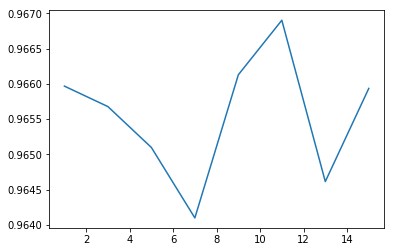

In [7]:
features, labels = load_data(classes)
features, labels = data_shuffling(features, labels)
features, labels, _, _ = data_split(features, labels)
records = []
for k in ks:
    accuracy = 0.
    for i in range(cross_val_times):
        features, labels = data_shuffling(features, labels)
        train_features, train_labels, validation_features, validation_labels = data_split(features, labels)
        predictions = kNN_inference(train_features, train_labels, validation_features)
        accuracy += np.mean((predictions == validation_labels).astype(np.float32)) / cross_val_times
    records.append((k, accuracy))
records = np.array(records)
plt.plot(records[:, 0], records[:, 1])
plt.show()